In [13]:
#importing dataset
import kaggle
import shutil
import os
import zipfile


In [14]:
#add json file to directory
# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))



!kaggle competitions download -c induction-task 



  0%|          | 0.00/201M [00:00<?, ?B/s]
  0%|          | 1.00M/201M [00:01<05:06, 683kB/s]
  1%|          | 2.00M/201M [00:01<02:31, 1.38MB/s]
  1%|▏         | 3.00M/201M [00:01<01:34, 2.20MB/s]
  2%|▏         | 5.00M/201M [00:02<00:52, 3.94MB/s]
  3%|▎         | 7.00M/201M [00:02<00:36, 5.64MB/s]
  4%|▍         | 9.00M/201M [00:02<00:28, 6.98MB/s]
  5%|▌         | 11.0M/201M [00:02<00:24, 8.24MB/s]
  6%|▋         | 13.0M/201M [00:02<00:21, 9.23MB/s]
  7%|▋         | 15.0M/201M [00:02<00:19, 9.89MB/s]
  8%|▊         | 17.0M/201M [00:03<00:18, 10.4MB/s]
  9%|▉         | 19.0M/201M [00:03<00:17, 10.9MB/s]
 10%|█         | 21.0M/201M [00:03<00:17, 11.1MB/s]
 11%|█▏        | 23.0M/201M [00:03<00:16, 11.4MB/s]
 12%|█▏        | 25.0M/201M [00:03<00:16, 10.9MB/s]
 13%|█▎        | 27.0M/201M [00:04<00:18, 9.73MB/s]
 14%|█▍        | 28.0M/201M [00:04<00:18, 9.68MB/s]
 14%|█▍        | 29.0M/201M [00:04<00:18, 9.68MB/s]
 15%|█▍        | 30.0M/201M [00:04<00:18, 9.70MB/s]
 15%|█▌        | 31.0

In [ ]:

# Unzipping the file
with zipfile.ZipFile('induction-task.zip', 'r') as zip_ref:
    zip_ref.extractall('DATA')

print(f"Contents extracted to {'DATA'}")


Contents extracted to DATA


In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
import os
import cv2

# Resized shape
new_size = (224, 224)

# Source and destination directories
source_dir = 'DATA/Data/Train/Real'
destination_dir = 'DATA/Data/REALN'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Reshaping all images to 224x224
for filename in os.listdir(source_dir):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(source_dir, filename)
        img = cv2.imread(img_path)
        
        if img is not None:  # Ensure the image was read successfully
            img_resized = cv2.resize(img, new_size)
            save_path = os.path.join(destination_dir, filename)
            cv2.imwrite(save_path, img_resized)
        else:
            print(f"Failed to read {filename}")

print("All real training images are reshaped and saved.")


All real training images are reshaped and saved.


In [6]:
import os
import cv2

# Resized shape
new_size = (224, 224)

# Source and destination directories
source_dir = 'DATA/Data/Train/AI'
destination_dir = 'DATA/Data/AIN'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Reshaping all images to 224x224
for filename in os.listdir(source_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Case-insensitive check
        img_path = os.path.join(source_dir, filename)
        img = cv2.imread(img_path)
        
        if img is not None:  # Ensure the image was read successfully
            img_resized = cv2.resize(img, new_size)
            save_path = os.path.join(destination_dir, filename)
            cv2.imwrite(save_path, img_resized)
        else:
            print(f"Failed to read {filename}")

print("All images are reshaped and saved.")


All images are reshaped and saved.


In [7]:
import os
import numpy as np
from PIL import Image

# Path to the folder containing images
image_folder = "DATA\Data\REALN"

# Desired size (all images should have the same dimensions)
image_size = (224, 224)  # Example size (height, width)

# List to store all image arrays
image_array_list = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize(image_size)
        img_array = np.array(img)  
        image_array_list.append(img_array)

# Stack all image arrays into a single NumPy array (N, H, W, C)
real_array = np.stack(image_array_list)

print(f"Final array shape: {real_array.shape}")



Final array shape: (400, 224, 224, 3)


In [8]:
print(real_array[87].shape)

(224, 224, 3)


In [9]:
import os
import numpy as np
from PIL import Image

# Path to the folder containing images
image_folder = "DATA/Data/AIN"

# Desired size (all images should have the same dimensions)
image_size = (224, 224)  # Example size (height, width)

# List to store all image arrays
image_array_list = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Case-insensitive check
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize(image_size)  # Resize the image
        img_array = np.array(img)  # Convert to NumPy array
        image_array_list.append(img_array)  # Append to the list

# Stack all image arrays into a single NumPy array (N, H, W, C)
ai_array = np.stack(image_array_list)

# Print the final shape of the stacked array
print(f"Final array shape: {ai_array.shape}")


Final array shape: (401, 224, 224, 3)


In [10]:
ai_labels = np.zeros(len(ai_array))  # [0, 0, ..., 0]
real_labels = np.ones(len(real_array))  # [1, 1, ..., 1]

X = np.concatenate((ai_array, real_array), axis=0)  # Combine image arrays
Y = np.concatenate((ai_labels, real_labels), axis=0)  # Combine labels

In [11]:
print(X.shape)
print(Y.shape)

(801, 224, 224, 3)
(801,)


In [12]:
from sklearn.utils import shuffle

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

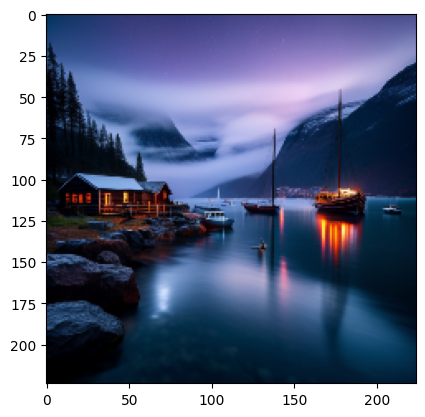

In [ ]:
plt.imshow(X[10])

In [ ]:
print(Y[10])

0.0


In [ ]:
X = X / 255.0
print(X[50])

[[[0.25490196 0.32156863 0.43921569]
  [0.25490196 0.3254902  0.43921569]
  [0.25882353 0.3254902  0.44313725]
  ...
  [0.3372549  0.29019608 0.41568627]
  [0.33333333 0.29019608 0.41960784]
  [0.32941176 0.28627451 0.41176471]]

 [[0.25490196 0.31764706 0.43529412]
  [0.25882353 0.32156863 0.43921569]
  [0.25882353 0.32156863 0.44313725]
  ...
  [0.34117647 0.28627451 0.42352941]
  [0.34117647 0.28627451 0.42352941]
  [0.3372549  0.29019608 0.41960784]]

 [[0.25490196 0.31764706 0.43137255]
  [0.25882353 0.31764706 0.43921569]
  [0.25882353 0.32156863 0.43921569]
  ...
  [0.34901961 0.29019608 0.42745098]
  [0.34901961 0.29019608 0.42352941]
  [0.34509804 0.28627451 0.42745098]]

 ...

 [[0.00784314 0.03529412 0.04313725]
  [0.01176471 0.05098039 0.05490196]
  [0.01568627 0.07058824 0.07058824]
  ...
  [0.02745098 0.08627451 0.08627451]
  [0.02352941 0.0627451  0.07058824]
  [0.01568627 0.05882353 0.06666667]]

 [[0.00392157 0.05098039 0.05098039]
  [0.01176471 0.06666667 0.06666667]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.layers import BatchNormalization
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

NameError: name 'pretrained_model' is not defined

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X, Y,
    epochs=10,
    batch_size=32
)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.6532 - loss: 0.0000e+00
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7324 - loss: 0.0000e+00
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7959 - loss: 0.0000e+00
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7543 - loss: 0.0000e+00
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8238 - loss: 0.0000e+00
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7813 - loss: 0.0000e+00
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7760 - loss: 0.0000e+00
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8163 - loss: 0.0000e+00
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8099 - loss: 0.0000e+00
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7344 - loss: 0.0000e+00


In [ ]:
import os
import cv2

# Set the path to your images folder
image_folder = "/content/Data/Test"
output_folder = "/content/Test_resized"
os.makedirs(output_folder, exist_ok=True)

# Desired shape (width, height)
new_size = (224, 224)

# Loop through all images and reshape them
a=0
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Add other extensions if needed
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, new_size)  # Resize the image
        cv2.imwrite(os.path.join(output_folder, filename), img_resized)  # Save the reshaped image
        a+=1

print("All images have been reshaped and saved.")
print(a)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
!rm -rf /content/Test_resized

In [ ]:

# Path to the folder containing images
image_folder ="/content/Test_resized"

# Desired size (all images should have the same dimensions)
image_size = (224, 224)  # Example size (height, width)

# List to store all image arrays
image_array_list = []

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png")  or filename.endswith(".jpeg"):  # Add more extensions if needed
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).resize(image_size)  # Resize to ensure consistent shape
        img_array = np.array(img)  # Convert image to NumPy array (H, W, C)
        image_array_list.append(img_array)  # Append the array to the list

# Stack all image arrays into a single NumPy array (N, H, W, C)
test_array = np.stack(image_array_list)

print(f"Final array shape: {test_array.shape}")



Final array shape: (199, 224, 224, 3)


In [ ]:
print(test_array[0])
test_array=test_array/255.0

[[[ 0  7 17]
  [ 0  7 17]
  [ 0  7 17]
  ...
  [ 0  2 11]
  [ 1  1 11]
  [ 1  1 11]]

 [[ 0  7 17]
  [ 0  7 17]
  [ 0  7 17]
  ...
  [ 0  2 11]
  [ 1  1 11]
  [ 1  1 11]]

 [[ 0  7 15]
  [ 0  7 15]
  [ 0  7 15]
  ...
  [ 0  2  9]
  [ 0  2  9]
  [ 0  2  9]]

 ...

 [[ 0  1  0]
  [ 0  1  0]
  [ 0  0  0]
  ...
  [ 1  0  6]
  [ 1  0  6]
  [ 1  0  6]]

 [[ 0  0  2]
  [ 0  0  2]
  [ 0  0  2]
  ...
  [ 1  0  6]
  [ 0  0  5]
  [ 0  0  5]]

 [[ 0  0  2]
  [ 0  0  2]
  [ 0  0  2]
  ...
  [ 1  0  6]
  [ 0  0  5]
  [ 0  0  5]]]


In [ ]:
prediction = model.predict(test_array)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


In [ ]:
print(prediction)

[[0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.  

In [ ]:
print(prediction.shape)

(199, 1)


In [ ]:
import numpy as np
import csv

# Example: image IDs (filenames for the 200 test images)
image_ids = [f'image_{i+1}' for i in range(200)]  # image_1, image_2, ..., image_200

# Convert the prediction probabilities to labels
# If prediction > 0.5, classify as 'Real'; else classify as 'AI'
labels = ['Real' if pred > 0.5 else 'AI' for pred in prediction]

# Open a CSV file for writing
with open('submission.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(['Id', 'Label'])

    # Write each image ID and corresponding label
    for img_id, label in zip(image_ids, labels):
        writer.writerow([img_id, label])

print("Submission file created: submission.csv")


Submission file created: submission.csv


In [ ]:
import numpy as np
import csv

# Example: image IDs (filenames for the 200 test images)
image_ids = [f'image_{i+1}' for i in range(200) if i+1 != 62]  # Skip image_62

# Convert the prediction probabilities to labels
# If prediction > 0.5, classify as 'Real'; else classify as 'AI'
labels = ['Real' if pred > 0.5 else 'AI' for pred in prediction]

# Ensure the length of image_ids and labels match after removing image_62
if len(image_ids) != len(labels):
    print("Error: Mismatch between number of image IDs and predictions.")
else:
    # Open a CSV file for writing
    with open('submission.csv', mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header
        writer.writerow(['Id', 'Label'])

        # Write each image ID and corresponding label
        for img_id, label in zip(image_ids, labels):
            writer.writerow([img_id, label])

    print("Submission file created: submission.csv")


Submission file created: submission.csv
